# Emsembling Learning and Random Forest

In many cases if you aggregate the predictions of a group of predictors (such as classifiers or regressors), often the prediciton is better that the individual predictors.

A group of predictors is called an *ensemble*

As an example of a Emsemble method, you can train a group of Decision Tree classifiers, each on a different random subset of the training set. To make predictions, you obtain the predcition of all the individual trees, then predict the class that gets the most votes. Such emsemble of Decision Trees is called *Random Forest*

## Votign Classifiers

If we have a few classifiers, each one achieving about 80% accuracy (eg. a Logistic Regression classifier, a SVM classifier, a Random Forest Classifier, a K-nearest Neighbors classifier...). A very simple way to create an even better classifier is to aggregate the predictions of each classifier and predict the class that gets the most votes. This majority-vote classifier is called *hard voting* classifier.

This emsemble often achieves a higher accuracy than the best classifier.

If we build and esemble containing 1000 classifiers that are indidividually correct the 51% of time (barely better than random guessing). If you predict the majority voted class, you can hope for up to 75% accuracy.

> Esemble methods work best when predictors are as independent from one another as possible. One way to get diverse classifiers is to train them using very different algorithms. This increases the chance that they will make very different types of error, imporving the ensemble's accuracy

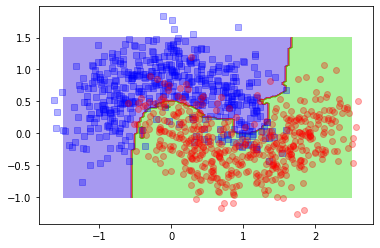

In [1]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt
X, y = make_moons(1000, noise =0.3)

log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clg = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting= 'hard')
voting_clg.fit(X,y)


def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    #y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.4)
    #plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

plot_predictions(voting_clg, [-1.5, 2.5, -1, 1.5])
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs', alpha = 0.3)
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'ro', alpha =0.3)    
plt.show()

In [2]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

for clf in (log_clf, rnd_clf, svm_clf, voting_clg):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))
    

LogisticRegression 0.825
RandomForestClassifier 0.87
SVC 0.875
VotingClassifier 0.86


## Bagging and Pasting 

Another approach is to use the same training algorithm for every predictor and train them in different random subset of the trainin set.

Whem sampling is performed *with* replacement, is called *bagging* (shor for *bootstrap aggregatin*). When sampling is perfomed *without* replacement, it is called *pasting*

Once all predictors are trained, the ensemble can make a prediction for a new instance by simply aggregating the predicition of all predictors.

Each individula predictor has a higher bias and variance thatn if it were trained on the oniginal training set, but aggregation reduces both bias and variance. The result is that the ensemble has the same bias but less variance thant the a single predictor trained on the original training set.

### Baggig and Pasting in Scikit-Learn 

Scikit-Learn offers a simple API for both bagging and pasting with ```BaggingClassifier``` (or ```BaggingRegressor```). If you want to use pasting instead, just set ```boostrap = False```

In [3]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500, 
    max_samples = 100, bootstrap = True, n_jobs=-1)

bag_clf.fit(X_train, y_train)
y_pred_bag = bag_clf.predict(X_test)

dtree_clf = DecisionTreeClassifier()
dtree_clf.fit(X_train,y_train)
y_pred_tree = dtree_clf.predict(X_test)


In [4]:
accuracy_score(y_test, y_pred_bag)

0.88

In [5]:
accuracy_score(y_test, y_pred_tree)

0.84

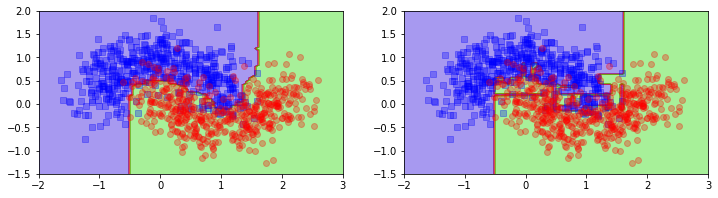

In [6]:
plt.figure(figsize=(12,3))

plt.subplot(121)
plot_predictions(bag_clf, [-2, 3, -1.5, 2])
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs', alpha = 0.3)
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'ro', alpha =0.3)    

plt.subplot(122)
plot_predictions(dtree_clf, [-2, 3, -1.5, 2])
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs', alpha = 0.3)
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'ro', alpha =0.3)    
plt.show()

## Random Forests

A Random Forest Alrgorithm is an Ensemble. Instead of building a ```BaggingClassifier```, we can use instead the ```RandomForestClassifier``` 

0.87


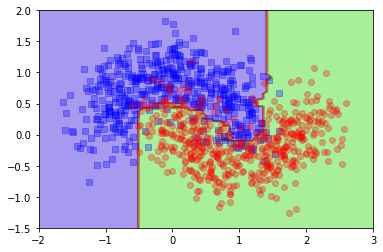

In [7]:
from sklearn.ensemble import RandomForestClassifier

rndf_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes = 16, n_jobs = -1)
rndf_clf.fit(X_train, y_train)

y_pred_rndf = rndf_clf.predict(X_test)
accurcy_rndf = accuracy_score(y_test, y_pred_rndf)
print(accurcy_rndf)
plot_predictions(rndf_clf, [-2, 3, -1.5, 2])
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs', alpha = 0.3)
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'ro', alpha =0.3)    


The Random Forest algorithm introduces extra randomness when growing trees; instead of searching for the very best feature when splitting a node, it searches for the best feature amon a random subset of features. The algorithm resulsts in greater tree diversity. 

The following ```BaggingClassifier``` is roughly equivalent to the previous ```RandomForestClassifer```

0.87


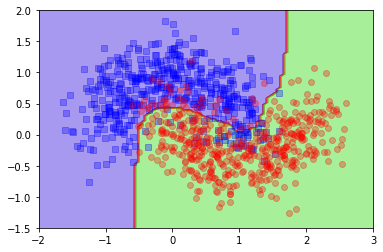

In [8]:
bag_clf = BaggingClassifier(
         DecisionTreeClassifier(splitter="random", max_leaf_nodes=16),
         n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1)

bag_clf.fit(X_train, y_train)

y_pred_bag = bag_clf.predict(X_test)

accurcy_bag = accuracy_score(y_test, y_pred_bag)
print(accurcy_bag)
plot_predictions(bag_clf, [-2, 3, -1.5, 2])
plt.plot(X[:,0][y==0], X[:, 1][y==0], 'bs', alpha = 0.3)
plt.plot(X[:,0][y==1], X[:, 1][y==1], 'ro', alpha =0.3)    


### Feature importance

One great quality of Rnadom Forest is that they make it easy to measure the relative importance of each feature

It is a weight average, where each node's weight is equal to the number of training samples that assiciated with it. Then, all features are scales sot that the sum of all is equal to 1

In [9]:
from sklearn.datasets import load_iris

iris = load_iris()

rndf_clf = RandomForestClassifier(n_estimators = 500, n_jobs = -1)
rndf_clf.fit(iris['data'], iris['target'])
for name, score in zip(iris['feature_names'], rndf_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.11751142812921112
sepal width (cm) 0.02650728645676608
petal length (cm) 0.42005627453667543
petal width (cm) 0.4359250108773475


## Boosting

Originaly called *hypothesis boosting*, refers to any Ensemble method that can combine several weak learners into a strong learner.

### AdaBoost

One way for a new predictor to correct its predecessor is to pay a bit more attention to the training instances that its predecssor underfitted.


### Gradient Boosting 
Gradient boosting works by sequentially adding predictors to an ensemble, each one correcting its predecessor. However, instead of tweaking the instance weights at every iteration like AdaBoost does, this method tries to fit the new predictor to the residual errors made by the previous predictor.

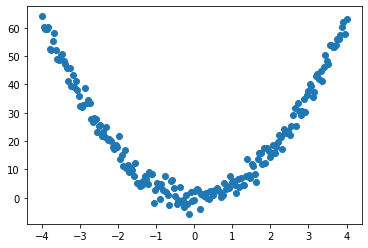

In [10]:
X0 = np.linspace(-4,4,200)
y0 = 4*X0**2 + 2.5*np.random.randn(1,200)
X = X0.reshape(-1,1)
y = y0.reshape(-1,1)

plt.scatter(X, y)

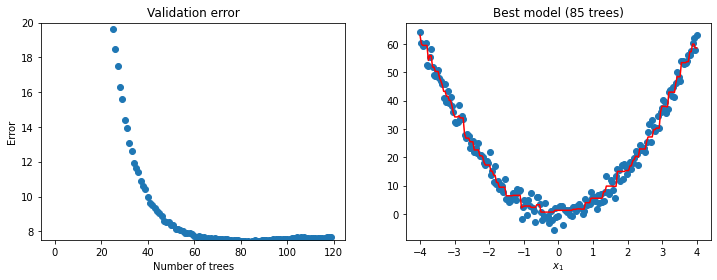

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor

X_train, X_val, y_train, y_val = train_test_split(X,y)

gbrt = GradientBoostingRegressor(max_depth = 2, n_estimators = 120)
gbrt.fit(X_train, y_train.ravel())
errors = [mean_squared_error(y_val, y_pred) for
          y_pred in gbrt.staged_predict(X_val)]
best_n_estimators = np.argmin(errors) + 1

gbrt_best = GradientBoostingRegressor(max_depth  = 2, n_estimators = best_n_estimators)
gbrt_best.fit(X_train, y_train.ravel())
y_pred_gbrt_best = gbrt_best.predict(X0.reshape(-1,1))

plt.figure(figsize=(12,4))

plt.subplot(121)
plt.scatter(range(len(errors)), errors)
plt.ylabel('Error')
plt.xlabel('Number of trees')
plt.ylim(7.5,20)
plt.title('Validation error')


plt.subplot(122)
plt.scatter(X,y)
plt.plot(X0.reshape(-1,1), y_pred_gbrt_best, 'r-')
plt.xlabel('$x_1$')
plt.title(f'Best model ({best_n_estimators} trees)')
plt.show()

The same can be used using the ```learning_rate``` hyperparameter. In this case the learning rate scales the contribution of each tree. If you set it to a low value, such as 0.1 you will need more trees in the ensemble to fit the training set